###Importando Data

In [ ]:
#Importando librerias
import pandas as pd
import numpy as np

##Importando desde el drive los archivos de training data y testing data
from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/My Drive/Proyecto_DSP/Dataset_MPU/'
DTraining=pd.read_csv(PATH+"train.csv")
DTesting=pd.read_csv(PATH+"test.csv")


Mounted at /content/drive


###Modelo-1

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical


le=preprocessing.LabelEncoder()

DTrain = DTraining
DataGyro=DTrain.iloc[0:,120:136]
DataAcc=DTrain.iloc[0:,0:16]
DataGrav=DTrain.iloc[0:,40:56]

Data_Gyro=DataGyro.to_numpy()
Data_Acc=DataAcc.to_numpy()
Data_Grav=DataGrav.to_numpy()

DataInput=np.append(Data_Acc,Data_Grav,axis=1)
DataIn=np.append(DataInput,Data_Gyro,axis=1)
#DataInput=Data_Acc;

DTest=DTesting
DGyro=DTest.iloc[0:,120:136]
DAcc=DTest.iloc[0:,0:16]
DGrav=DTest.iloc[0:,40:56]

D_Gyro=DGyro.to_numpy()
D_Acc=DAcc.to_numpy()
D_Grav=DGrav.to_numpy()

DTestInput=np.append(D_Acc,D_Grav, axis=1)
DTestIn=np.append(DTestInput,D_Gyro,axis=1)

le.fit(DTrain['Activity'])
label=list(le.classes_)

DataOutput=le.transform(DTrain['Activity'])
DataOutput=to_categorical(DataOutput)

DTestOut=le.transform(DTest['Activity'])
DTestOut=to_categorical(DTestOut)

inputdim=DataIn.shape[1]
outputdim=DataOutput.shape[1]


Using TensorFlow backend.


In [ ]:
##Red Neuronal 
model01= Sequential () 
model01.add(Dense(units=250, activation='relu', input_dim=inputdim))
model01.add(Dense(units=250, activation='relu', input_dim=250))
model01.add(Dense(units=250, activation='relu', input_dim=250))
model01.add(Dense(units=outputdim, activation='softmax'))



In [ ]:
##Entrenamiento de red

model01.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])

history01 = model01.fit(DataIn,DataOutput, epochs=100, batch_size=150, validation_split=0.001, shuffle=False)


Train on 7344 samples, validate on 8 samples
Epoch 1/100
7344/7344 [==============================] - 0s 58us/step - loss: 0.8763 - accuracy: 0.6400 - val_loss: 0.6488 - val_accuracy: 1.0000
Epoch 2/100
7344/7344 [==============================] - 0s 41us/step - loss: 0.5843 - accuracy: 0.7271 - val_loss: 0.7625 - val_accuracy: 0.6250
Epoch 3/100
7344/7344 [==============================] - 0s 39us/step - loss: 0.4891 - accuracy: 0.7832 - val_loss: 1.0284 - val_accuracy: 0.1250
Epoch 4/100
7344/7344 [==============================] - 0s 42us/step - loss: 0.4153 - accuracy: 0.8189 - val_loss: 1.0011 - val_accuracy: 0.1250
Epoch 5/100
7344/7344 [==============================] - 0s 40us/step - loss: 0.3880 - accuracy: 0.8397 - val_loss: 0.5618 - val_accuracy: 0.8750
Epoch 6/100
7344/7344 [==============================] - 0s 39us/step - loss: 0.3587 - accuracy: 0.8502 - val_loss: 0.3044 - val_accuracy: 1.0000
Epoch 7/100
7344/7344 [==============================] - 0s 39us/step - loss: 0

In [ ]:
model01.save(PATH+"Proyecto.h5")

In [ ]:
from keras.models import load_model
red=load_model(PATH+"Proyecto.h5")

In [ ]:
Testpre= red.predict(DTestIn)

from  sklearn.metrics import confusion_matrix

Testpre=Testpre>= 0.5
Testpre=Testpre + [0, 0, 0, 0, 0, 0]


cm=confusion_matrix(DTestOut.argmax(axis=1),Testpre.argmax(axis=1))

print(cm)


[[510   0   0   0   0  27]
 [  0 378 104   0   0   9]
 [  0  66 466   0   0   0]
 [  1   0   0 348  62  85]
 [  1   0   0  41 324  54]
 [  0   0   0 113  29 329]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 32.09375, 'True Label')

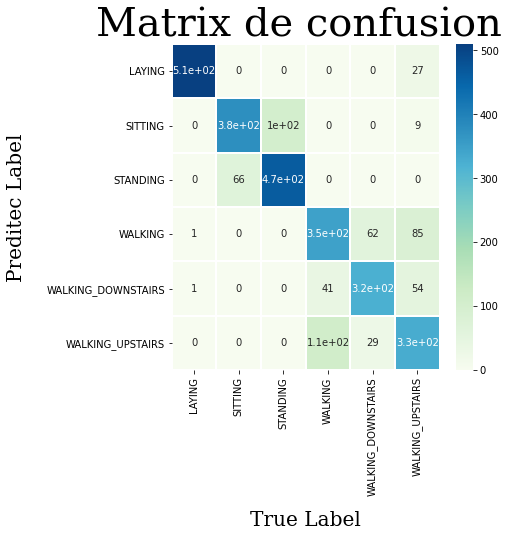

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

resultado = pd.DataFrame(cm, index=label,columns=label)
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(1,1,1)
sn.heatmap(resultado, annot=True, linewidths=1, linecolor= 'white', cmap="GnBu")
font= {'family': 'serif',
     'color': 'darkred',
    'weight': 'normal',
    'size':14}
ax.set_title("Matrix de confusion ",fontdict ={'family': 'serif','color': 'black','weight': 'normal','size':40})
ax.set_ylabel("Preditec Label", labelpad=20, fontdict={'family': 'serif','color': 'black','weight': 'normal','size':20})
ax.set_xlabel("True Label", labelpad=15, fontdict={'family': 'serif','color': 'black','weight': 'normal','size':20})

In [ ]:
Li=6478
Ls=Li+1

Gyro=DTrain.iloc[Li:Ls,120:136]
Acc=DTrain.iloc[Li:Ls,0:16]
Grav=DTrain.iloc[Li:Ls,40:56]

PredictGyro=Gyro.to_numpy()
PredictAcc=Acc.to_numpy()
PredictGrav=Grav.to_numpy()

DataPred=np.append(PredictAcc,PredictGrav, axis=1)
DataPredict=np.append(DataPred,PredictGyro, axis =1)

Actividad=DTrain.iloc[Li:Ls,562:]
print(Actividad)
DataPredict.shape

      Activity
6478  STANDING


(1, 48)

In [ ]:
actividad=red.predict(DataPredict)
actividad=actividad[0]
actividad=np.argmax(actividad)
actividad

print(label[actividad])

STANDING


###Modelo 2 

In [ ]:
PATH_2 = '/content/drive/My Drive/Proyecto_DSP/DatasetHumanActivity/'

Test = pd.read_csv(PATH_2+"jog_16/sub_9.csv")

print(Test.head())
Dat=Test.describe()
Dat.head()

   Unnamed: 0  attitude.roll  ...  userAcceleration.y  userAcceleration.z
0           0      -0.396751  ...            0.655057            1.348757
1           1      -0.104562  ...            2.122216            0.988781
2           2      -0.048151  ...           -0.929432            0.023401
3           3      -0.028313  ...           -1.172439            0.574634
4           4      -0.081964  ...           -1.367846            1.188206

[5 rows x 13 columns]


,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,535.500000,-1.284642,-1.179798,0.197819,-0.232285,0.913055,-0.087140,0.077484,-0.097097,-0.007248,0.046963,0.201263,0.095319
std,309.604048,0.851451,0.158488,1.715161,0.100187,0.064234,0.301182,3.277070,3.286686,1.545825,0.893266,1.532151,1.130814
min,0.000000,-3.049649,-1.556907,-3.141224,-0.596629,0.631297,-0.718198,-9.471050,-11.549159,-5.481345,-4.764206,-2.546883,-4.517324
25%,267.750000,-2.092390,-1.295005,-1.364801,-0.284661,0.871308,-0.319785,-2.338089,-2.751275,-0.907754,-0.335394,-0.902615,-0.610708


In [ ]:
def MediaAbsDes(label):
  SumaAbs = abs(Test[label] - Test[label].mean())
  tBodyAcc_mad = 0
  for i in SumaAbs:
    tBodyAcc_mad = tBodyAcc_mad + i
  tBodyAcc_mad = tBodyAcc_mad/Test[label].count()
  return tBodyAcc_mad

def SigMagArea(label):
  Pot_x = Test[label+"x"]*Test[label+"x"]
  Pot_y = Test[label+"y"]*Test[label+"y"]
  Pot_z = Test[label+"z"]*Test[label+"z"]
  Sum = Pot_z+Pot_y+Pot_x
  Mag = []
  for i in Sum:
    Mag.append(pow(i, 0.5))
  SigArea = np.trapz(Mag,dx=0.001)
  return SigArea

line = pd.DataFrame(columns=("tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z",
                                 "tBodyAcc-std()-X", "tBodyAcc-std()-Y", "tBodyAcc-std()-Z",
                                 "tBodyAcc-mad()-X", "tBodyAcc-mad()-Y", "tBodyAcc-mad()-Z",
                                 "tBodyAcc-max()-X", "tBodyAcc-max()-Y", "tBodyAcc-max()-Z",
                                 "tBodyAcc-min()-X", "tBodyAcc-min()-Y", "tBodyAcc-min()-z",
                                 "tBodyAcc-sma()",
                                 "tGravityAcc-mean()-X", "tGravityAcc-mean()-Y", "tGravityAcc-mean()-Z",
                                 "tGravityAcc-std()-X",  "tGravityAcc-std()-Y",  "tGravityAcc-std()-Z",
                                 "tGravityAcc-mad()-X",  "tGravityAcc-mad()-Y",  "tGravityAcc-mad()-Z",
                                 "tGravityAcc-max()-X",  "tGravityAcc-max()-Y",  "tGravityAcc-max()-Z",
                                 "tGravityAcc-min()-X",  "tGravityAcc-min()-Y",  "tGravityAcc-min()-z",
                                 "tGravityAcc-sma()",
                                 "tBodyGyro-mean()-X", "tBodyGyro-mean()-Y", "tBodyGyro-mean()-Z",
                                 "tBodyGyro-std()-X",  "tBodyGyro-std()-Y",  "tBodyGyro-std()-Z",
                                 "tBodyGyro-mad()-X",  "tBodyGyro-mad()-Y",  "tBodyGyro-mad()-Z",
                                 "tBodyGyro-max()-X",  "tBodyGyro-max()-Y",  "tBodyGyro-max()-Z",
                                 "tBodyGyro-min()-X",  "tBodyGyro-min()-Y",  "tBodyGyro-min()-z",
                                 "tBodyGyro-sma()",                                 
                                 )
                        )
tBodyAcc_madx = MediaAbsDes('userAcceleration.x')
tBodyAcc_mady = MediaAbsDes('userAcceleration.y')
tBodyAcc_madz = MediaAbsDes('userAcceleration.z')
tBodyAcc_sma = SigMagArea('userAcceleration.')
    
tGravityAcc_madx = MediaAbsDes('gravity.x')
tGravityAcc_mady = MediaAbsDes('gravity.y')
tGravityAcc_madz = MediaAbsDes('gravity.z')
tGravityAcc_sma = SigMagArea('gravity.')
    
tBodyGyro_madx = MediaAbsDes('rotationRate.x')
tBodyGyro_mady = MediaAbsDes('rotationRate.y')
tBodyGyro_madz = MediaAbsDes('rotationRate.z')
tBodyGyro_sma = SigMagArea('rotationRate.') 

line.loc[len(line)] = [Test['userAcceleration.x'].mean(), Test['userAcceleration.y'].mean(), Test['userAcceleration.z'].mean(),
                            Test['userAcceleration.x'].std(), Test['userAcceleration.y'].std(), Test['userAcceleration.z'].std(),
                            tBodyAcc_madx, tBodyAcc_mady, tBodyAcc_madz,
                            Test['userAcceleration.x'].max(), Test['userAcceleration.y'].max(), Test['userAcceleration.z'].max(),
                            Test['userAcceleration.x'].min(), Test['userAcceleration.y'].min(), Test['userAcceleration.z'].min(),
                            tBodyAcc_sma,
                            Test['gravity.x'].mean(), Test['gravity.y'].mean(), Test['gravity.z'].mean(),
                            Test['gravity.x'].std(),  Test['gravity.y'].std(),  Test['gravity.z'].std(),
                            tBodyAcc_madx, tBodyAcc_mady, tBodyAcc_madz,
                            Test['gravity.x'].max(), Test['gravity.y'].max(), Test['gravity.z'].max(),
                            Test['gravity.x'].min(), Test['gravity.y'].min(), Test['gravity.z'].min(),
                            tBodyAcc_sma,
                            Test['rotationRate.x'].mean(), Test['rotationRate.y'].mean(), Test['rotationRate.z'].mean(),
                            Test['rotationRate.x'].std(),  Test['rotationRate.y'].std(),  Test['rotationRate.z'].std(),
                            tBodyAcc_madx, tBodyAcc_mady, tBodyAcc_madz,
                            Test['userAcceleration.x'].max(), Test['userAcceleration.y'].max(), Test['userAcceleration.z'].max(),
                            Test['userAcceleration.x'].min(), Test['userAcceleration.y'].min(), Test['userAcceleration.z'].min(),
                            tBodyAcc_sma
    ]
line.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-z,tBodyAcc-sma(),tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-z,tGravityAcc-sma(),tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-z,tBodyGyro-sma()
0,0.046963,0.201263,0.095319,0.893266,1.532151,1.130814,0.651719,1.226897,0.871196,2.556985,6.256442,4.738638,-4.764206,-2.546883,-4.517324,1.971032,-0.232285,0.913055,-0.08714,0.100187,0.064234,0.301182,0.651719,1.226897,0.871196,0.034518,0.999904,0.543646,-0.596629,0.631297,-0.718198,1.971032,0.077484,-0.097097,-0.007248,3.27707,3.286686,1.545825,0.651719,1.226897,0.871196,2.556985,6.256442,4.738638,-4.764206,-2.546883,-4.517324,1.971032


In [ ]:
act=red.predict(line)
#actividad=actividad[0]
#actividad=np.argmax(line)
act

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

###Modelo 3

In [ ]:
df=pd.read_csv(PATH_2+"Data/Organice.csv")
df.head()


,Unnamed: 0,Unnamed: 0.1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-z,tBodyAcc-sma(),tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-z,tGravityAcc-sma(),tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-z,tBodyGyro-sma(),activity,Subject
0,0,1,0.062493,-0.001832,0.062361,0.343783,0.295011,0.327470,0.265936,0.224217,0.259506,1.760975,1.549614,0.953478,-1.398820,-0.735431,-1.114514,0.877063,0.745272,0.604755,-0.141934,0.097532,0.120785,0.186086,0.265936,0.224217,0.259506,0.911532,0.856268,0.293529,0.500776,0.346594,-0.552549,0.877063,-0.313635,-0.245480,0.141903,1.079116,1.964371,0.702076,0.265936,0.224217,0.259506,1.760975,1.549614,0.953478,-1.398820,-0.735431,-1.114514,0.877063,walking_downstairs,1
1,1,2,0.054399,0.038012,0.044710,0.278013,0.432882,0.368502,0.216892,0.331767,0.282965,1.252113,2.335580,1.395295,-0.686280,-1.343249,-2.978514,1.167329,0.164360,0.938075,-0.228186,0.065884,0.045575,0.185790,0.216892,0.331767,0.282965,0.350123,0.996035,0.305808,-0.044268,0.774339,-0.631297,1.167329,-0.036648,-0.334969,0.113063,1.535199,1.743561,0.615815,0.216892,0.331767,0.282965,1.252113,2.335580,1.395295,-0.686280,-1.343249,-2.978514,1.167329,walking_downstairs,2
2,2,3,0.037259,0.009115,0.010426,0.197836,0.418848,0.167822,0.153698,0.335672,0.129454,0.868865,2.187013,1.077647,-0.659297,-1.175966,-0.727667,0.979456,0.231165,0.953609,-0.127939,0.082217,0.025297,0.115869,0.153698,0.335672,0.129454,0.367038,0.999664,0.271128,-0.006696,0.863391,-0.407423,0.979456,-0.052527,-0.334982,0.062300,0.819125,0.869482,0.416013,0.153698,0.335672,0.129454,0.868865,2.187013,1.077647,-0.659297,-1.175966,-0.727667,0.979456,walking_downstairs,3
3,3,4,0.084948,0.131560,0.002137,0.430478,0.635430,0.730588,0.335604,0.452131,0.561161,2.175775,4.795959,3.569844,-1.567188,-1.413092,-4.622187,1.742504,-0.111635,0.939830,-0.067831,0.145950,0.055857,0.274367,0.335604,0.452131,0.561161,0.294939,0.999947,0.582521,-0.488580,0.712623,-0.668649,1.742504,0.066531,-0.374688,0.101141,2.005602,2.168470,0.925931,0.335604,0.452131,0.561161,2.175775,4.795959,3.569844,-1.567188,-1.413092,-4.622187,1.742504,walking_downstairs,4
4,4,5,-0.035430,0.013390,-0.025111,0.220211,0.406248,0.226170,0.167262,0.305447,0.172831,0.920563,2.383387,0.759159,-1.372518,-1.205033,-1.530437,0.965099,-0.155962,0.933577,0.238797,0.099058,0.056368,0.184613,0.167262,0.305447,0.172831,0.107513,0.999982,0.542068,-0.701947,0.465827,-0.594544,0.965099,0.011575,-0.349338,-0.084188,1.060793,0.933363,0.537218,0.167262,0.305447,0.172831,0.920563,2.383387,0.759159,-1.372518,-1.205033,-1.530437,0.965099,walking_downstairs,5


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)
train.to_csv(PATH_2+"Data/train.csv",index=False)
test.to_csv(PATH_2+"Data/test.csv",index=False)
train.activity.

In [ ]:
training_in=train.iloc[:,2:50]
training_out=train.iloc[:,0:51]


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

DataIn=train.iloc[:,2:50]
DataTest=test.iloc[:,2:50]

le=preprocessing.LabelEncoder()

le.fit(train['activity'])
etiqueta=list(le.classes_)

DataOutput=le.transform(train['activity'])
DataOutput=to_categorical(DataOutput)

DTestOut=le.transform(test['activity'])
DTestOut=to_categorical(DTestOut)

inputdim=DataIn.shape[1]
outputdim=DataOutput.shape[1]



In [ ]:
##Red Neuronal 
model01= Sequential () 
model01.add(Dense(units=250, activation='relu', input_dim=inputdim))
model01.add(Dense(units=250, activation='relu', input_dim=250))
model01.add(Dense(units=250, activation='relu', input_dim=250))
model01.add(Dense(units=outputdim, activation='softmax'))



In [ ]:
model01.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])

history01 = model01.fit(DataIn,DataOutput, epochs=100, batch_size=150, validation_split=0.001, shuffle=False)

Train on 251 samples, validate on 1 samples
Epoch 1/100
251/251 [==============================] - 0s 2ms/step - loss: 1.6850 - accuracy: 0.1554 - val_loss: 1.4593 - val_accuracy: 1.0000
Epoch 2/100
251/251 [==============================] - 0s 101us/step - loss: 1.5265 - accuracy: 0.3705 - val_loss: 1.2888 - val_accuracy: 1.0000
Epoch 3/100
251/251 [==============================] - 0s 99us/step - loss: 1.4533 - accuracy: 0.5020 - val_loss: 1.2333 - val_accuracy: 1.0000
Epoch 4/100
251/251 [==============================] - 0s 109us/step - loss: 1.2956 - accuracy: 0.6135 - val_loss: 1.1544 - val_accuracy: 1.0000
Epoch 5/100
251/251 [==============================] - 0s 90us/step - loss: 1.2133 - accuracy: 0.6056 - val_loss: 1.1183 - val_accuracy: 1.0000
Epoch 6/100
251/251 [==============================] - 0s 95us/step - loss: 1.1285 - accuracy: 0.6096 - val_loss: 0.9964 - val_accuracy: 1.0000
Epoch 7/100
251/251 [==============================] - 0s 105us/step - loss: 1.0018 - accur

In [ ]:
Testpre= model01.predict(DataTest)

from  sklearn.metrics import confusion_matrix

Testpre=Testpre>= 0.5
Testpre=Testpre + [0, 0, 0, 0, 0, 0]


cm=confusion_matrix(DTestOut.argmax(axis=1),Testpre.argmax(axis=1))

print(cm)


[[13  0  0  2  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 1  0  0 20  0  0]
 [ 1  0  0  0 28  0]
 [ 1  0  0  0  0 16]]


Text(0.5, 32.09375, 'True Label')

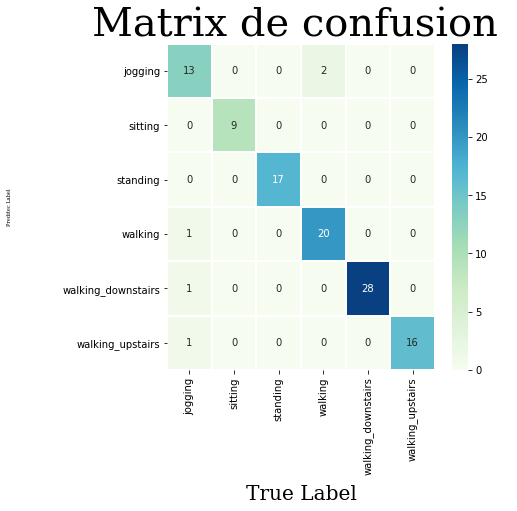

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

resultado = pd.DataFrame(cm, index=label,columns=label)
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(1,1,1)
sn.heatmap(resultado, annot=True, linewidths=1, linecolor= 'white', cmap="GnBu")
font= {'family': 'serif',
     'color': 'darkred',
    'weight': 'normal',
    'size':10}
ax.set_title("Matrix de confusion ",fontdict ={'family': 'serif','color': 'black','weight': 'normal','size':40})
ax.set_ylabel("Preditec Label", labelpad=50, fontdict={'family': 'serif','color': 'black','weight': 'normal','size':5})
ax.set_xlabel("True Label", labelpad=10, fontdict={'family': 'serif','color': 'black','weight': 'normal','size':20})

In [ ]:
Li=47
Ls=Li+1
DataPredict=test.iloc[Li:Ls,2:50]
Actividad=test.iloc[Li:Ls,50:51]
print(Actividad)


              activity
39  walking_downstairs


In [ ]:
actividad=model01.predict(DataPredict)
actividad=actividad[0]
actividad=np.argmax(actividad)
actividad

print(label[actividad])

walking_downstairs


In [ ]:
model01.save(PATH_2+"RedNeuronal.h5")

In [ ]:
from keras.models import load_model
RedNeuronal=load_model(PATH_2+"RedNeuronal.h5")

In [ ]:
RedNeuronal.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 250)               12250     
_________________________________________________________________
dense_7 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_8 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1506      
Total params: 139,256
Trainable params: 139,256
Non-trainable params: 0
_________________________________________________________________
